In [1]:
pwd

'/content'

In [2]:
!git clone https://github.com/rgrupesh/test.git

Cloning into 'test'...
remote: Enumerating objects: 10020, done.
remote: Counting objects: 100% (10020/10020), done.
remote: Compressing objects: 100% (9944/9944), done.
remote: Total 10020 (delta 74), reused 10016 (delta 73), pack-reused 0
Receiving objects: 100% (10020/10020), 10.94 MiB | 24.04 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import os

In [4]:
labels = []
images = []

for i in range(0,10):
    img = os.listdir("test/Data/" + str(i))
    for j in img:
        c_img = cv2.imread("test/Data/" + str(i) + "/" + str(j))
        img_resize = cv2.resize(c_img, (28,28))
        images.append(img_resize)
        labels.append(i)

In [5]:
print(f" images= {len(images)} labels={len(labels)}")

 images= 10160 labels=10160


In [6]:
images = np.array(images)
labels = np.array(labels)

print(f" images_shape={images.shape} labels_shape={labels.shape}")

 images_shape=(10160, 28, 28, 3) labels_shape=(10160,)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)
print(f"{train_images.shape} {test_images.shape}")

(8128, 28, 28, 3) (2032, 28, 28, 3)


In [9]:
train_images,  val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)
print(f"{train_images.shape} {val_images.shape}")

(6502, 28, 28, 3) (1626, 28, 28, 3)


In [10]:
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    img = img/255
    return img

In [11]:
train_images = np.array(list(map(preProcessing,train_images)))
val_images = np.array(list(map(preProcessing,val_images)))
test_images = np.array(list(map(preProcessing,test_images)))

print(f"{train_images.shape} {val_images.shape} {test_images.shape}")

(6502, 28, 28) (1626, 28, 28) (2032, 28, 28)


In [12]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
val_images = val_images.reshape(val_images.shape[0], 28, 28, 1)

print(f"{train_images.shape} {val_images.shape} {test_images.shape}")

(6502, 28, 28, 1) (1626, 28, 28, 1) (2032, 28, 28, 1)


In [13]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [15]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

In [16]:
history = model.fit(datagen.flow(train_images, train_labels),
                              epochs = 20, batch_size=128, validation_data = (val_images, val_labels))

Epoch 1/20
204/204 [==============================] - 2s 12ms/step - loss: 2.0276 - accuracy: 0.2479 - val_loss: 0.8802 - val_accuracy: 0.8555
Epoch 2/20
204/204 [==============================] - 2s 10ms/step - loss: 0.9363 - accuracy: 0.6801 - val_loss: 0.1316 - val_accuracy: 0.9637
Epoch 3/20
204/204 [==============================] - 2s 10ms/step - loss: 0.5211 - accuracy: 0.8268 - val_loss: 0.0849 - val_accuracy: 0.9717
Epoch 4/20
204/204 [==============================] - 2s 10ms/step - loss: 0.3898 - accuracy: 0.8736 - val_loss: 0.0617 - val_accuracy: 0.9766
Epoch 5/20
204/204 [==============================] - 2s 10ms/step - loss: 0.2984 - accuracy: 0.9017 - val_loss: 0.0479 - val_accuracy: 0.9889
Epoch 6/20
204/204 [==============================] - 2s 10ms/step - loss: 0.2637 - accuracy: 0.9202 - val_loss: 0.0416 - val_accuracy: 0.9865
Epoch 7/20
204/204 [==============================] - 2s 10ms/step - loss: 0.2357 - accuracy: 0.9276 - val_loss: 0.0303 - val_accuracy: 0.9926

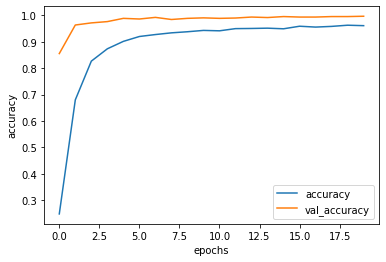

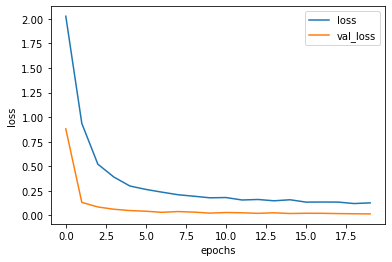

In [17]:
def show_plot(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_" + string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.legend([string,"val_" + string])
    plt.show()
    
show_plot(history,"accuracy")  
show_plot(history,"loss")

In [18]:
score = model.evaluate(test_images, test_labels, verbose=1)

64/64 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9916


In [19]:
model.save("digitRecognizer.h5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Digit_Recognizer/assets
